Analisis exploratorio

El problema a resolver
En este tutorial vamos a suponer que una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

Y vamos a suponer que la pregunta que queremos resolver tras este análisis es: ¿qué perfil tienen los clientes con mayor potencial de conversión?

«age»: edad (numérica)

«job»: tipo de trabajo (categórica: «admin.», «unknown», «unemployed», «management», «housemaid», «entrepreneur», «student», «blue-collar»,»self-employed», «retired», «technician», «services»)

«marital»: estado civil (categórica: «married», «divorced», «single»)

«education»: nivel educativo (categórica: «unknown», «secondary», «primary», «tertiary»)

«default»: si dejó de pagar sus obligaciones (categórica: «yes», «no»)

«balance»: saldo promedio anual en euros (numérica)

«housing»: ¿tiene o no crédito hipotecario? (categórica: «yes», «no»)

«loan»: ¿tiene créditos de consumo? (categórica: «yes», «no»)

«contact»: medio a través del cual fue contactado (categórica: «unknown», «telephone», «cellular»)

«day»: último día del mes en el que fue contactada (numérica)

«month»: último mes en el que fue contactada (categórica: «jan», «feb», «mar», …, «nov», «dec»)

«duration»: duración (en segundos) del último contacto (numérica)

«campaign»: número total de veces que fue contactada durante la campaña (numérica)

«pdays»: número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)

«previous»: número de veces que ha sido contactada antes de esta campaña (numérica)

«poutcome»: resultado de la campaña de marketing anterior (categórica: «unknown», «other», «failure», «success»)

«y»: categoría ¿el cliente se suscribió a un depósito a término? (categórica: «yes», «no»)

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [130]:
df = pd.read_csv("C:/Users/argbr/Desktop/analisis exploratorio codificandobits/dataset_banco.csv")

In [131]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [132]:
# obtenemos la cantidad de registros y columnas con las que estamos trabajando
df.shape

(45215, 17)

In [133]:
# para poder saber cuales son datos categoricos y numericas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


                                         Limpieza del set de datos
En este proceso de limpieza haremos uso de diferentes herramientas de Pandas que nos permitirán abordar las situaciones que más comúnmente encontraremos en un set de datos tabular, como son:

1 El manejo de datos faltantes (que como lo acabamos de ver están presentes en nuestro set de datos)
La eliminación de columnas irrelevantes (es decir, columnas que no contienen información relacionada con el problema que queremos resolver)
2 El manejo de registros (filas) repetidos
3 El manejo de valores extremos (u «outliers») para el caso de las variables (columnas) numéricas
4 La limpieza de errores tipográficos que puedan existir en las variables categóricas

In [134]:
# eliminamos los datos faltantes
df.dropna(inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


In [135]:
#columnas irrelevantes 


In [136]:
#verificamos que sucede en las columnas numericas
df.describe(
    
)

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [137]:
# eliminar filas repetidas
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45203 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45203 non-null  int64  
 1   job        45203 non-null  object 
 2   marital    45203 non-null  object 
 3   education  45203 non-null  object 
 4   default    45203 non-null  object 
 5   balance    45203 non-null  float64
 6   housing    45203 non-null  object 
 7   loan       45203 non-null  object 
 8   contact    45203 non-null  object 
 9   day        45203 non-null  int64  
 10  month      45203 non-null  object 
 11  duration   45203 non-null  float64
 12  campaign   45203 non-null  int64  
 13  pdays      45203 non-null  float64
 14  previous   45203 non-null  int64  
 15  poutcome   45203 non-null  object 
 16  y          45203 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


In [138]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [139]:
# Outlayer de columas numericas primero preparamos las columnas numericas para hacer las graficas individuales y ver los valores extremos 
colum_num = ['age','balance','day', 'duration', 'campaign', 'pdays',
       'previous']

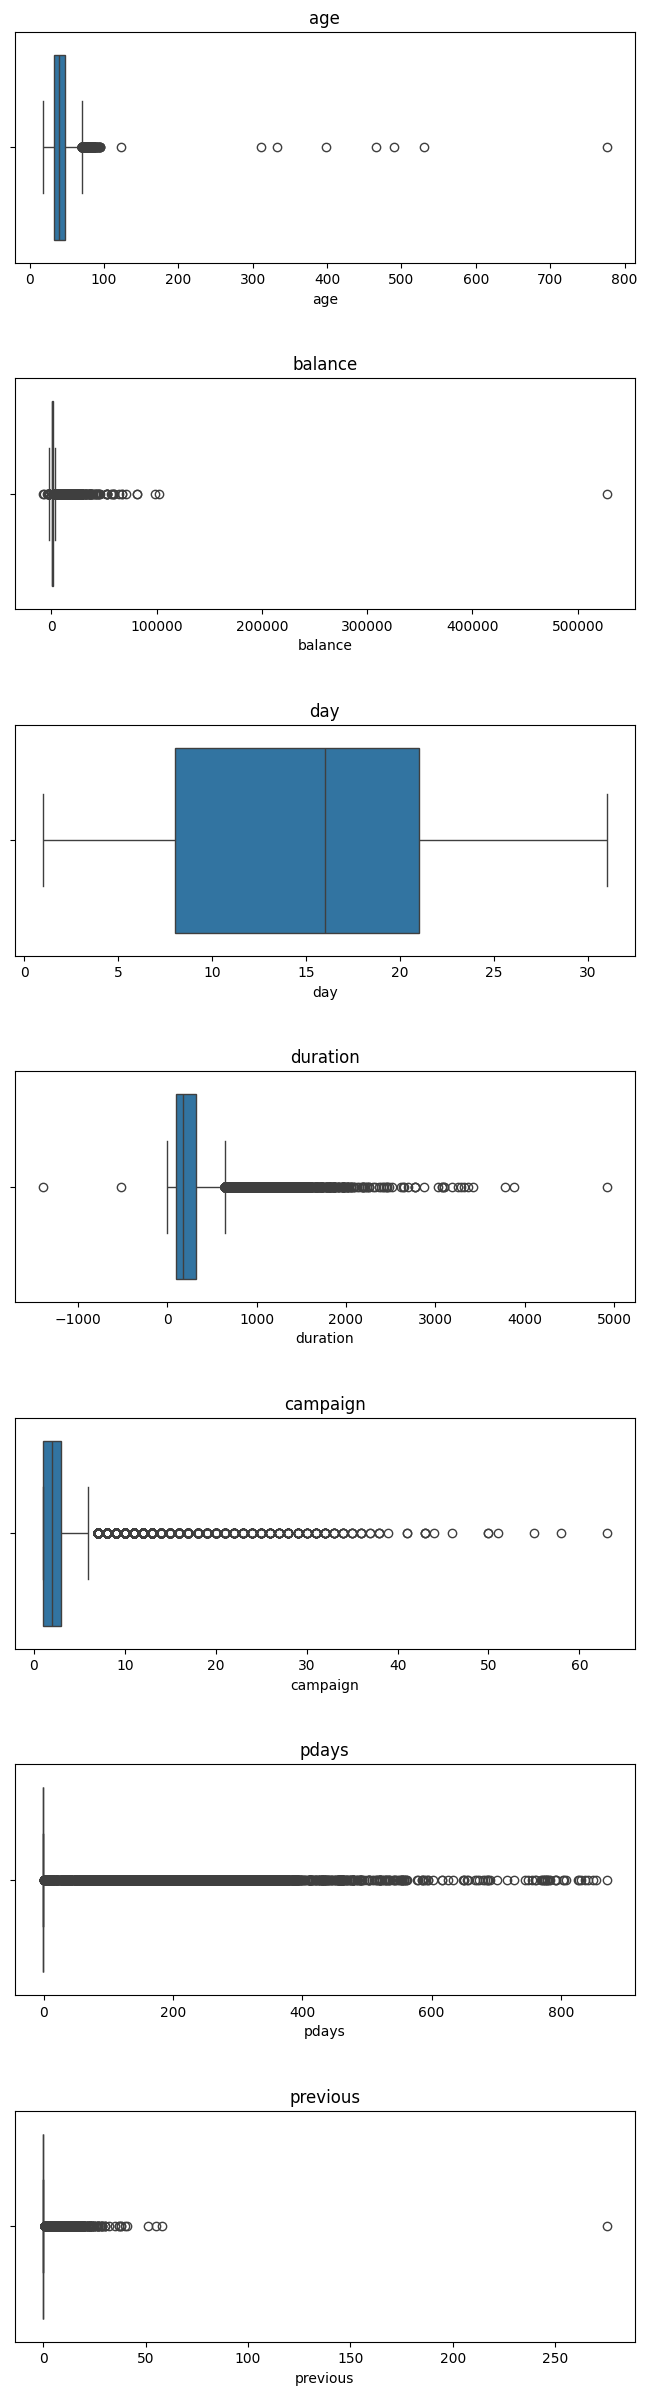

In [140]:
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(colum_num):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

Indentificamos segun los outlayers de los siguientes graficos

1 Notamos que en el boxplot de edad tenemos personas mayores a 100 años
2 Tenemos llamadas con minutos negativos 
3 Tenemos contacto previos en una persona de casi 300 llamadas


In [141]:
# parametrizamos para que la edad sea menor a 100 años
df = df[df["age"]<=100]
df.info()
# de 45203 registros que teniamos pasamos a 45195 

<class 'pandas.core.frame.DataFrame'>
Index: 45195 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45195 non-null  int64  
 1   job        45195 non-null  object 
 2   marital    45195 non-null  object 
 3   education  45195 non-null  object 
 4   default    45195 non-null  object 
 5   balance    45195 non-null  float64
 6   housing    45195 non-null  object 
 7   loan       45195 non-null  object 
 8   contact    45195 non-null  object 
 9   day        45195 non-null  int64  
 10  month      45195 non-null  object 
 11  duration   45195 non-null  float64
 12  campaign   45195 non-null  int64  
 13  pdays      45195 non-null  float64
 14  previous   45195 non-null  int64  
 15  poutcome   45195 non-null  object 
 16  y          45195 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


In [142]:
#eliminamos las llamdas con registro de minutos negativas
df = df[df["duration"]>0]
df.info()
# pasamos de 45195 registros a 45190

<class 'pandas.core.frame.DataFrame'>
Index: 45190 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45190 non-null  int64  
 1   job        45190 non-null  object 
 2   marital    45190 non-null  object 
 3   education  45190 non-null  object 
 4   default    45190 non-null  object 
 5   balance    45190 non-null  float64
 6   housing    45190 non-null  object 
 7   loan       45190 non-null  object 
 8   contact    45190 non-null  object 
 9   day        45190 non-null  int64  
 10  month      45190 non-null  object 
 11  duration   45190 non-null  float64
 12  campaign   45190 non-null  int64  
 13  pdays      45190 non-null  float64
 14  previous   45190 non-null  int64  
 15  poutcome   45190 non-null  object 
 16  y          45190 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


In [143]:
#actualizamos los registros quitando los outlayer de los contactos previos
df = df[df["previous"]<100]
df.info()
#pasamos de 45190 a 45189 registros

<class 'pandas.core.frame.DataFrame'>
Index: 45189 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


Verificamos si hay errores tipograficos en las subclases de las variables categoricas


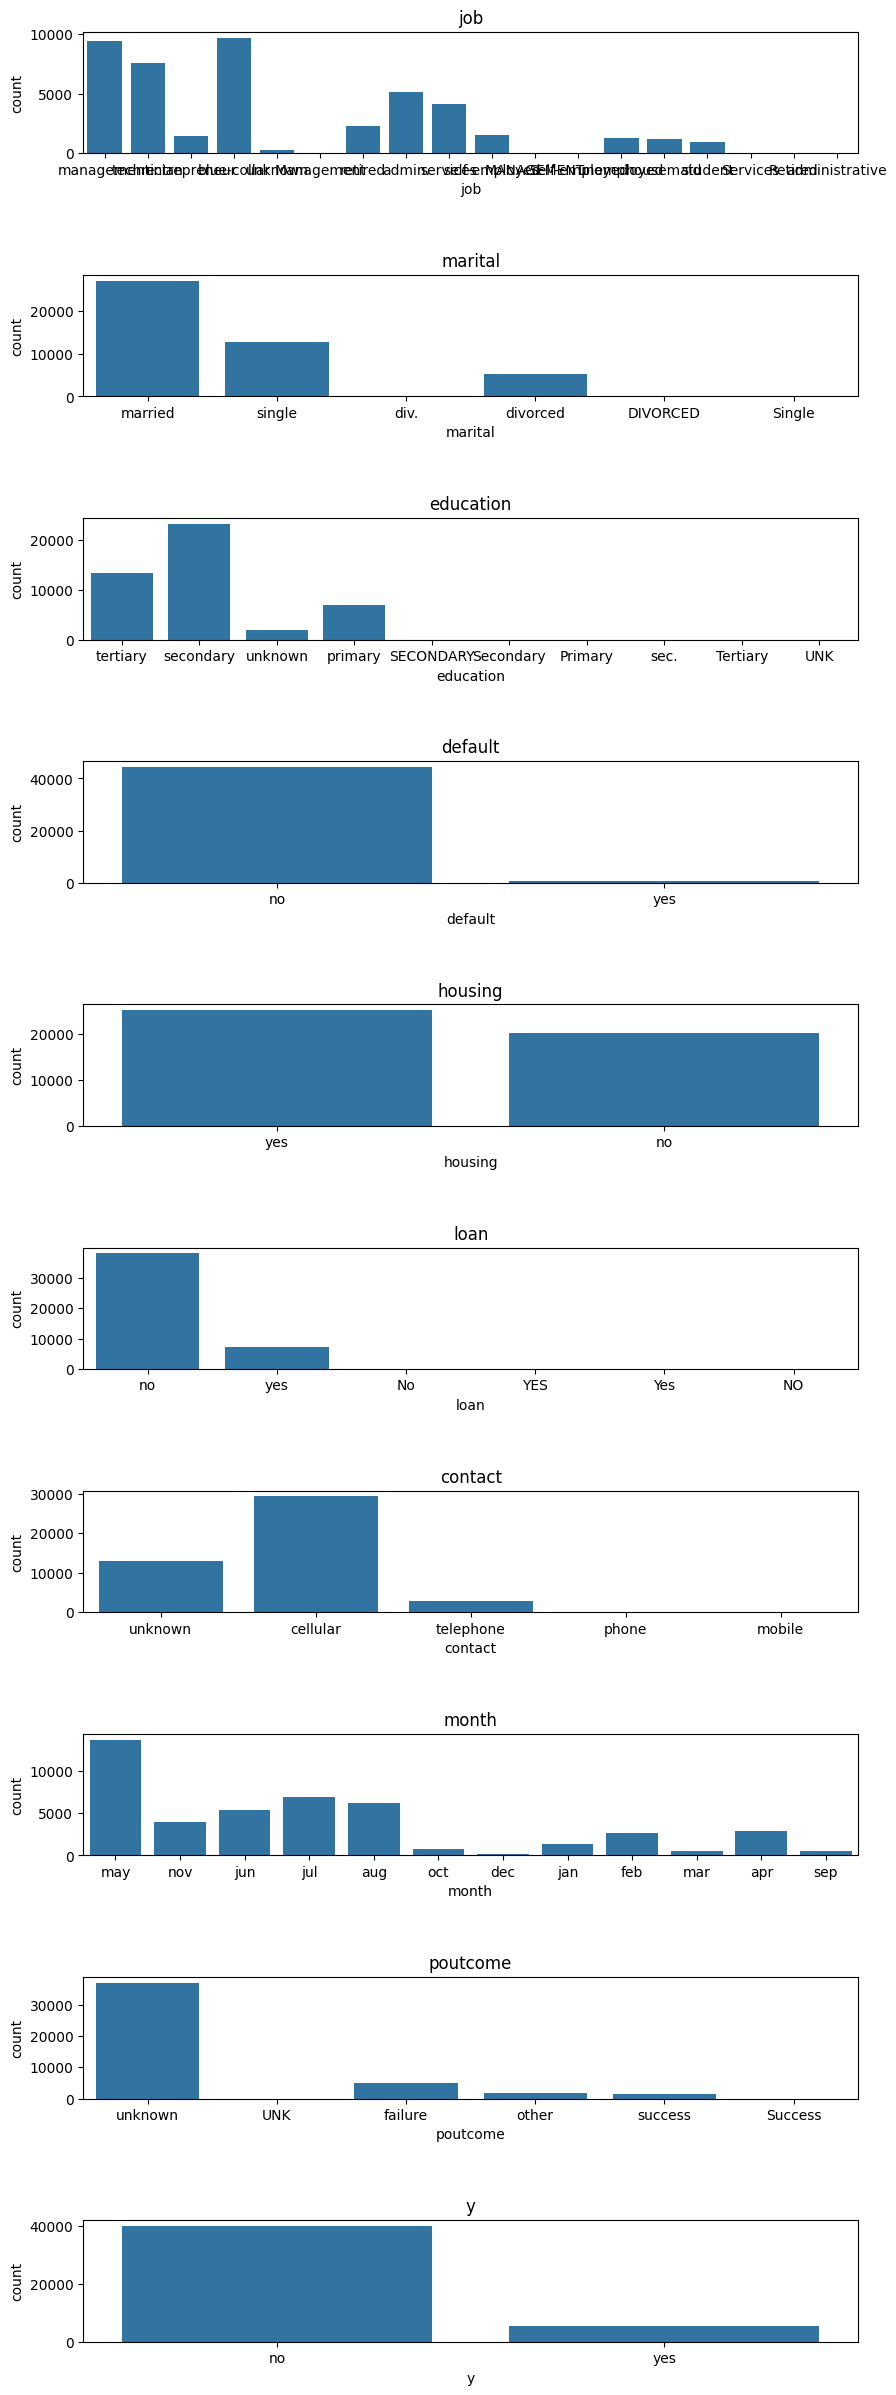

In [144]:
col_cat = ["job","marital","education","default","housing","loan","contact","month","poutcome","y"]
fig, ax= plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(col_cat):
    sns.countplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)
    

#fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
#fig.subplots_adjust(hspace=0.5)

#for i, col in enumerate(cols_num):
    #sns.boxplot(x=col, data=data, ax=ax[i])
    #ax[i].set_title(col)

In [145]:
#como podemos ver hay varias categorias que son las mismas por eemplo en job managment se escribe de 3 maneras distintas todo con minuscula, una la primetra en mayuscula, otra forma abreviada
# vamos a normalizar todas las categotias poniendo todo en minuscula como primer paso
for colum in df.columns:
    if colum in col_cat:
        df[colum] = df[colum].str.lower()

# generamos la grafica nuevamante 


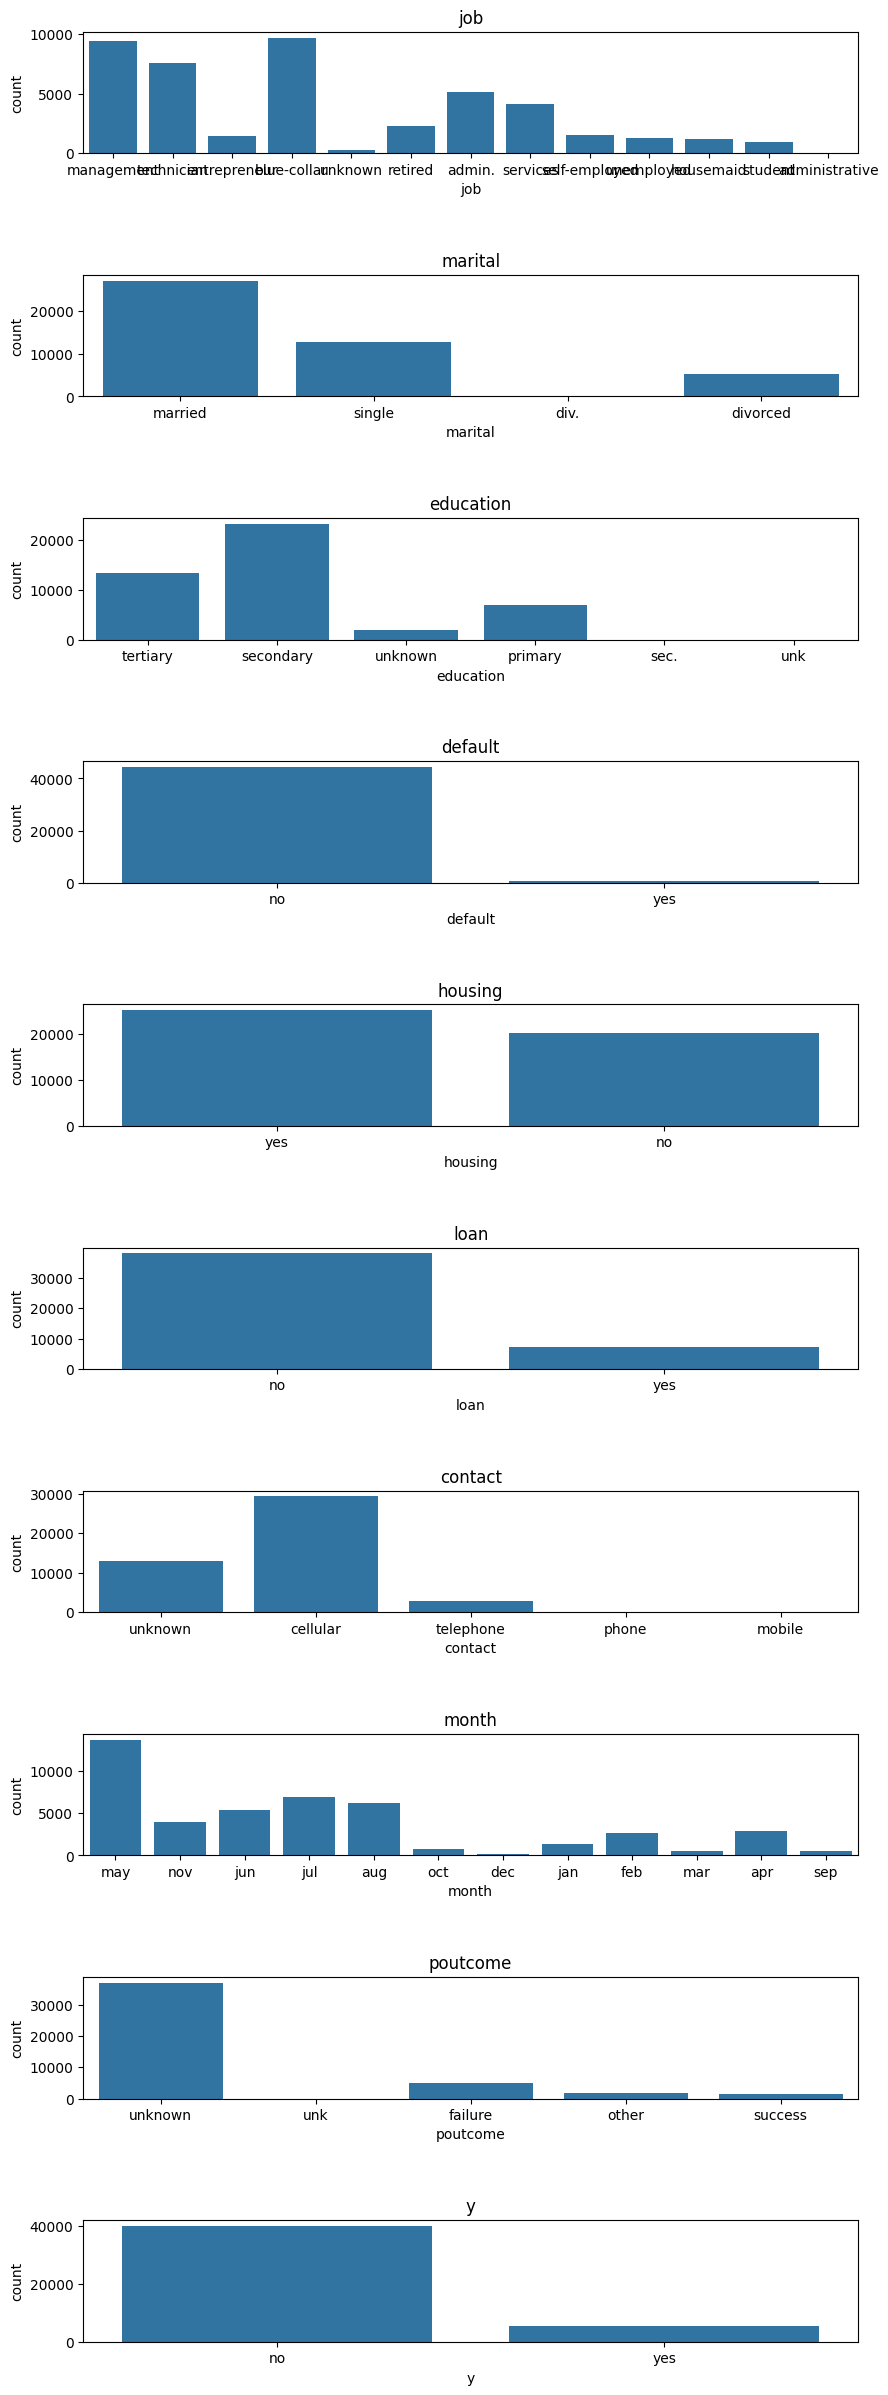

In [146]:
fig, ax= plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)
for i, col in enumerate(col_cat):
    sns.countplot(x=col, data=df ,ax=ax[i])
    ax[i].set_title(col)
    #ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

In [155]:

df["poutcome"] = df["poutcome"].str.replace("unknownnown","unknown", regex=False)
print(df["poutcome"].unique())


['unknown' 'failure' 'other' 'success']


In [156]:
# tenemos que integrar las palabras que no estan completo por ejemple en job unidicar adm. y administrative

df["job"] = df["job"].str.replace("admin.", "administrative",regex=False) 
print(df["job"].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']


In [ ]:
# divorciado aparece como div. y divorced
df["marital"] = df["marital"].str.replace("div.", "divorced",regex=False)
print(df["marital"].unique())

['married' 'single' 'divorced']


In [ ]:
# en educacion aparece sec. y secondary
df["education"] = df["education"].str.replace("sec.", "secondary", regex=False)
print(df["education"].unique())

['tertiary' 'secondary' 'unknown' 'primary']


In [175]:
#aen contacto aparece telephone y phone lo unificamos
df["contact"] = df["contact"].str.replace("telephone","phone", regex=False)
df["contact"] = df["contact"].str.replace("cellular", "mobile", regex=False )
print(df["contact"].unique())

['unknown' 'mobile' 'phone']


C:\Users\argbr\AppData\Local\Temp\ipykernel_8748\4054902505.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\argbr\AppData\Local\Temp\ipykernel_8748\4054902505.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\argbr\AppData\Local\Temp\ipykernel_8748\4054902505.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\argbr\AppData\Local\Temp\ipykernel_8748\4054902505.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xtic

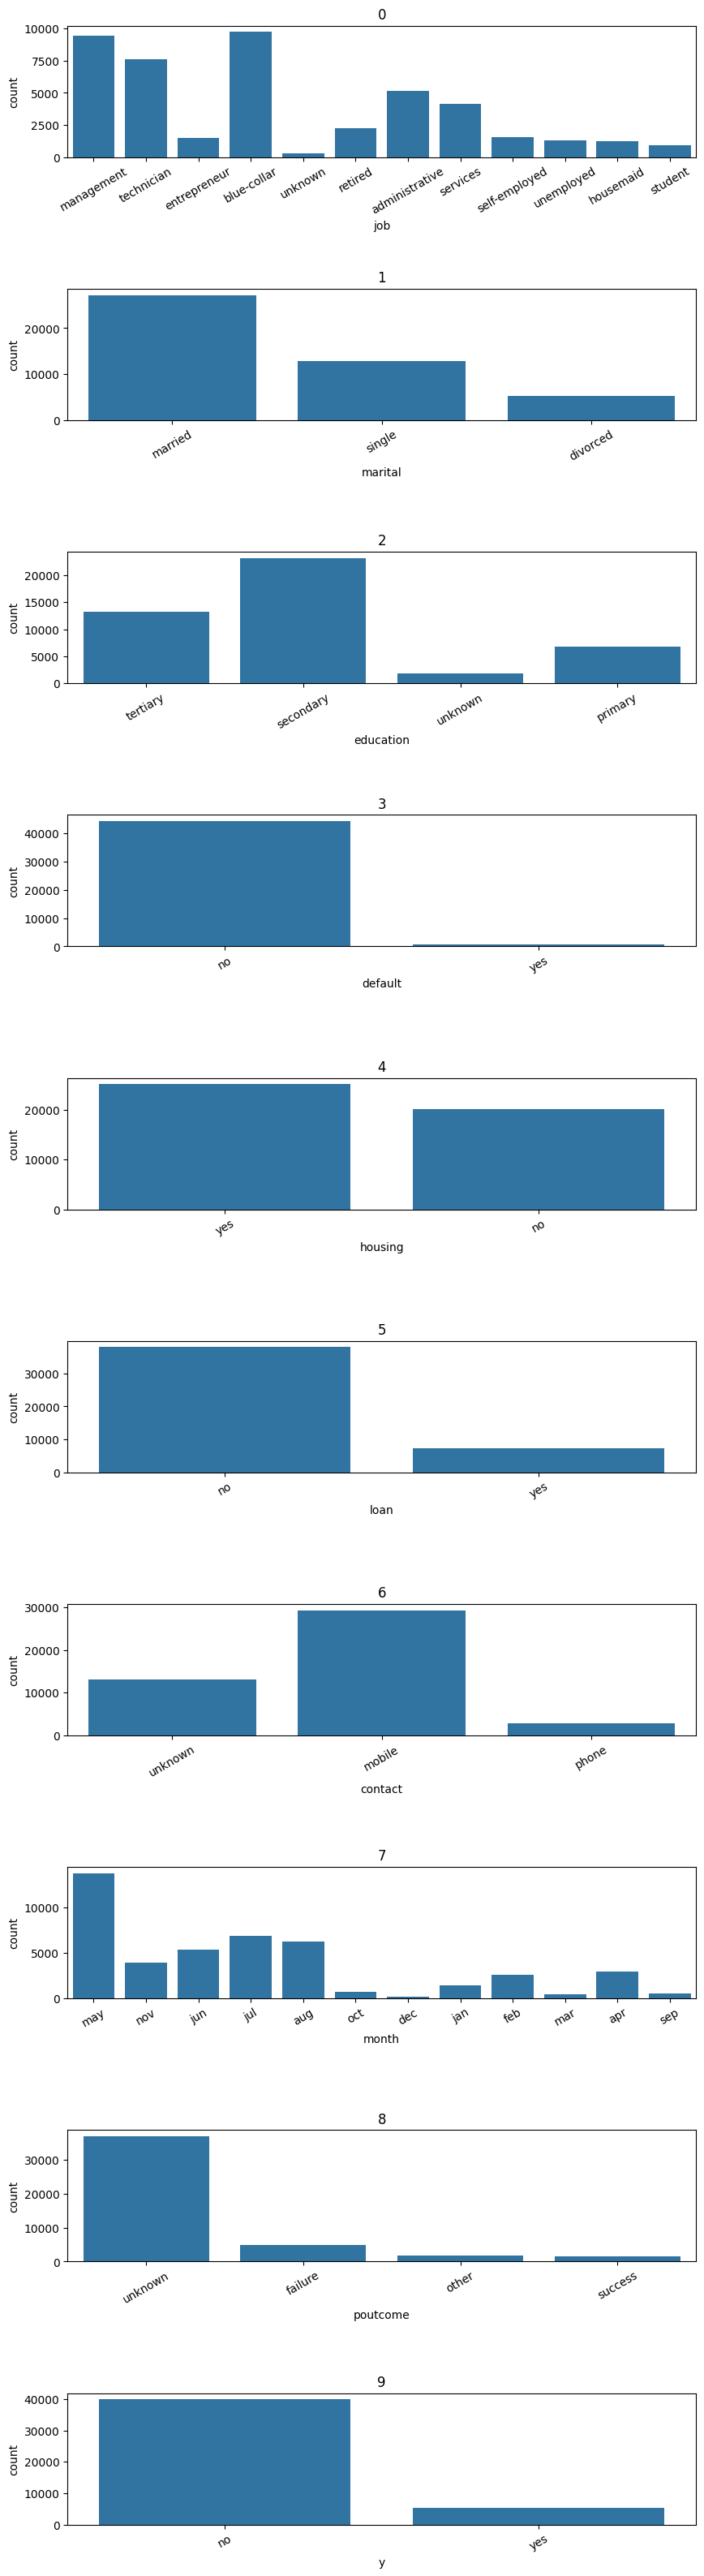

In [184]:
fig, ax= plt.subplots(nrows=10, ncols=1, figsize=(10,40))
fig.subplots_adjust(hspace=1)
for i, col in enumerate(col_cat):
    sns.countplot(x=col, data=df ,ax=ax[i])
    ax[i].set_title(i)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
    

In [185]:
#guardamos los cambios de analisis exploratorio en un archivo nuevo
df.to_csv("C:/Users/argbr/Desktop/analisis exploratorio codificandobits/dataset_banco_con_analisis_exp.csv")